## Preliminary Information

* To run this program, ensure the installation of Python 3, Jupyter Notebooks, Pandas, and Seaborn
* Dependencies we are testing for and looking into:
    * Tip Value Depends On:

## Get the Dataset

In [10]:
import csv
import pandas as pd

order_data = pd.read_csv("Data/order-initial-dataset.csv")
store_data = pd.read_csv("Data/store-initial-dataset.csv")

## Get identify necessary headers

In [11]:
# Filter out rows where Destination_type is "Delivery"
filtered_orders = order_data[order_data['Destination_type'] == 'Delivery']

#Print the filtered DataFrame
#print(filtered_orders)
print(filtered_orders.shape)

(3081, 8)


In [12]:
merged_df = pd.merge(filtered_orders, store_data, on='Store_dma_id', how='inner')
print(merged_df)
merged_df.to_csv("merged_data.csv", index=False)

      Store_dma_id  Rack_time  To_the_door_time  Otd_time Source_actor  \
0              541      3.967            18.717    12.900          iOS   
1              541      0.400            20.400    10.183          iOS   
2              541      1.683            21.867    14.583          iOS   
3              541      2.833            18.700    11.233          iOS   
4              541      6.317            25.500    12.767          iOS   
...            ...        ...               ...       ...          ...   
3076           541      4.133               NaN    13.700  Desktop Web   
3077           541     45.150               NaN    53.167    Uber Eats   
3078           541    229.150               NaN   236.617    Uber Eats   
3079           541     41.317               NaN    48.517    Uber Eats   
3080           541    129.000               NaN   135.950    Uber Eats   

     Destination_type  Subtotal_amount_USD  Tip_USD  Store_postal_code  \
0            Delivery                

## Data Visualization

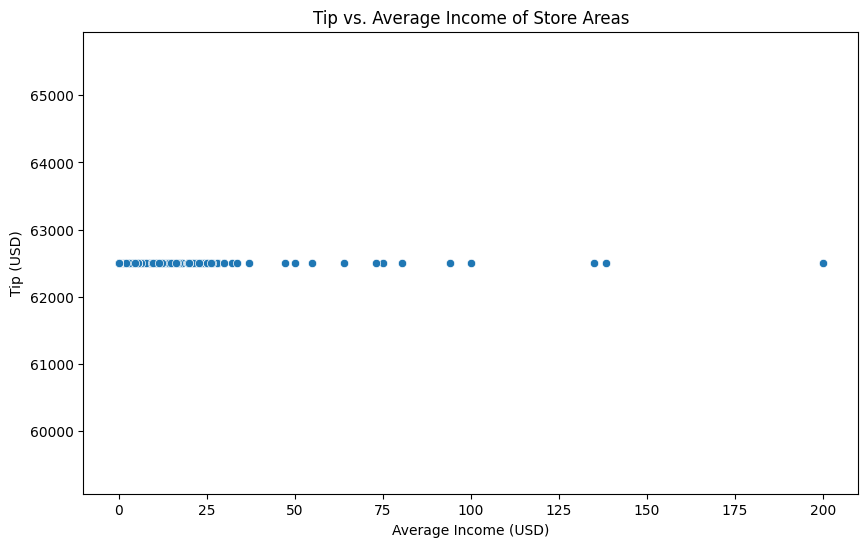

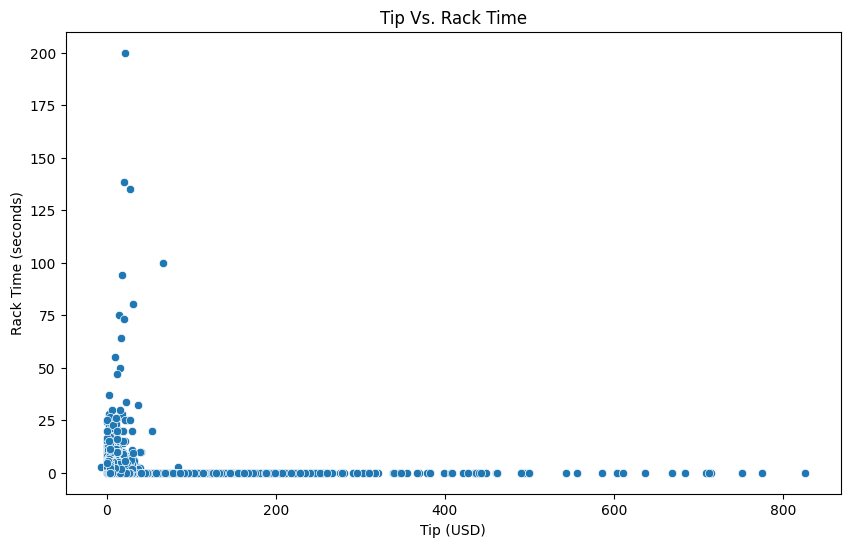

In [13]:
import seaborn as sns

# # # # #
#
# PLOT 1: Tip's dependence on Average Income
#
# # # # #
# Show the plot
plt.show()

import matplotlib.pyplot as plt2

plt2.figure(figsize=(10, 6))
sns.scatterplot(x='Tip_USD', y='Avg_income', data=merged_df)

# plot labels and title
plt2.xlabel('Average Income (USD)')
plt2.ylabel('Tip (USD)')
plt2.title('Tip vs. Average Income of Store Areas')


# # # # #
#
# PLOT 2: Rack Time's dependence on Tips
#
# # # # #
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rack_time', y='Tip_USD', data=merged_df)

# plot labels and title
plt.xlabel('Tip (USD)')
plt.ylabel('Rack Time (seconds)')
plt.title('Tip Vs. Rack Time')

# Show the plot
plt2.show()

## Get the Dataset